In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testkk/Conversation_intent - Sheet1.csv
/kaggle/input/testkk/kkmean10.csv
/kaggle/input/testkk/finemo.csv
/kaggle/input/testkk/Data/Thundertooth Part 2.docx
/kaggle/input/testkk/Data/Thundertooth Part 1.docx
/kaggle/input/testkk/Data/Thundertooth Part 4.docx
/kaggle/input/testkk/Data/Thundertooth Part 3.docx
/kaggle/input/financial-sentiment-analysis/data.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct", 
    device_map="cuda", 
    torch_dtype="auto", 
    trust_remote_code=True, 
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

2024-05-30 20:51:58.723192: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 20:51:58.723279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 20:51:58.859009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/3.35k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
first_instruction = """
Instructions:
Carefully read the given financial statement.
Determine the sentiment based on the criteria provided.
RESPOND only with the sentiment. positive, negative or neutral.
"""

first_response = """You are an advanced language model trained to analyze the sentiment of text. Your task is to classify the sentiment of a given financial statement as Positive, Negative, or Neutral. Consider the following detailed criteria for each classification:

Positive: The sentence expresses favorable financial performance, growth, profitability, optimistic outlook, or any kind of positive sentiment related to the company's financial status.
Negative: The sentence conveys unfavorable financial performance, losses, risks, pessimistic outlook, or any kind of negative sentiment related to the company's financial status.

For example:
POSITIVE: Amazon's consistent revenue growth and strong financial performance over the past decade highlight its robust business model and strategic market positioning, making it a reliable and attractive investment option.
NEGATIVE: Amazon's mounting operational costs and the increasing regulatory scrutiny on its business practices pose significant risks to its future profitability and market valuation.
NEUTRAL: Amazon's financial performance this quarter met analysts' expectations, showing steady growth in revenue and a stable market presence, but with no significant surprises or deviations from projected outcomes.
"""

In [5]:
def get_message(current_sentence):
    messages = [
        {"role": "user", "content":first_instruction},
        {"role": "assistant", "content":first_response},
        {"role": "user", "content": current_sentence}]
    return messages 

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

# output = pipe(messages, **generation_args)
# print(output[0]['generated_text'])

In [6]:
df = pd.read_csv("/kaggle/input/financial-sentiment-analysis/data.csv")
df.head(20)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [7]:
from tqdm import tqdm
import time

In [8]:
start = time.time()
df['LLMPrediction'] = ""

for x in tqdm(range(0,len(df['Sentence'][:500]))):
    df.loc[x,'LLMPrediction'] = pipe(get_message(df.loc[x,'Sentence']), **generation_args)[0]['generated_text']

end = time.time()
print("Time taken to perform all the predictions",end - start)

  2%|▏         | 10/500 [00:22<12:19,  1.51s/it]--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/opt/conda/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-pac

Time taken to perform all the predictions 1276.1455783843994


In [9]:
df['new'] = ''
#df.loc[0,'LLMPrediction'].split('\n')[0].strip().lower()
df['new'] = df['LLMPrediction'].apply(lambda x: x.split('\n')[0].strip().lower())
df.head()

,Sentence,Sentiment,LLMPrediction,new
0,The GeoSolutions technology will leverage Bene...,positive,Positive,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"Negative\n\nIn this instruction, the sentimen...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,Positive,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,Positive,positive
4,The Swedish buyout firm has sold its remaining...,neutral,Negative,negative


In [10]:
df['new'][:500].value_counts()

new
positive                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           257
negative                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [11]:
valid_df = df.loc[((df['new']=='positive')|(df['new']=='negative')|(df['new']=='neutral')),:]

In [12]:
valid_df.head()

,Sentence,Sentiment,LLMPrediction,new
0,The GeoSolutions technology will leverage Bene...,positive,Positive,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"Negative\n\nIn this instruction, the sentimen...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,Positive,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,Positive,positive
4,The Swedish buyout firm has sold its remaining...,neutral,Negative,negative


In [13]:
valid_df['new'].value_counts()

new
positive    257
negative    153
neutral      81
Name: count, dtype: int64

In [14]:
from sklearn.metrics import classification_report
print(classification_report(valid_df['Sentiment'],valid_df['new']))

              precision    recall  f1-score   support

    negative       0.46      0.91      0.61        78
     neutral       0.90      0.27      0.41       271
    positive       0.51      0.92      0.65       142

    accuracy                           0.56       491
   macro avg       0.62      0.70      0.56       491
weighted avg       0.72      0.56      0.52       491



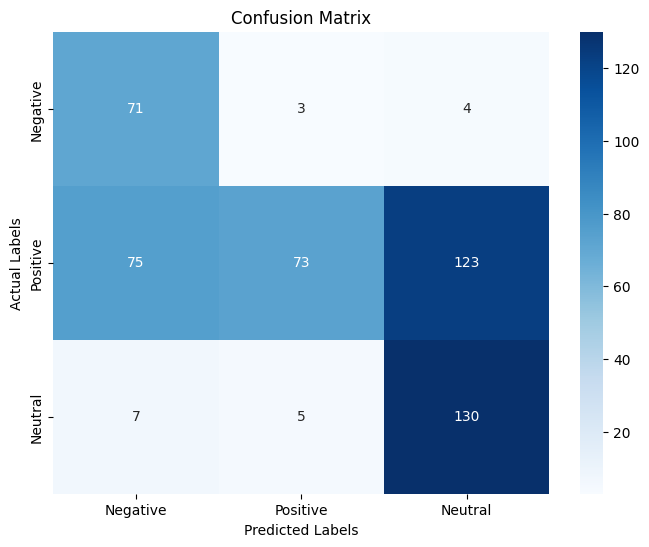

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(valid_df['Sentiment'],valid_df['new'])

# Define labels for the matrix
labels = ['Negative', 'Positive', 'Neutral']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
fm = pd.read_csv("/kaggle/input/testkk/finemo.csv")

In [17]:
fm.head()

,Dialog,Emotion
0,"""The recent stock market crash has left many i...",Despair
1,"""I'm thrilled to see my investments finally pa...",Joy
2,"""I'm really anxious about the upcoming financi...",Anxiety
3,"""The government's new policies are causing a l...",Confusion
4,"""Despite the challenges, we remain optimistic ...",Optimism


In [18]:
fm["Emotion"].unique()

array(['Despair', 'Joy', 'Anxiety', 'Confusion', 'Optimism', 'Anger',
       'Satisfaction', 'Frustration', 'Nervousness', 'Realization',
       'Disheartening', 'Excitement', 'Relief', 'Inspiration',
       'Uncertainty', 'Hopefulness', 'Fascination', nan, 'Concern',
       'Enthusiasm', 'Admiration', 'Disappointment', 'Approval',
       'Anticipation', 'Pride', 'Speculation', 'Worry', 'Curiosity',
       'Mixed feelings', 'Awe', 'Surprise', 'Interest', 'Controversy',
       'Confidence', 'Caution', 'Respect'], dtype=object)

In [19]:
first_instruction = """
Instructions:
Carefully read the given financial statement.
Determine the emotion expressed based on the criteria provided.
RESPOND only with the following list of emotions
'Despair', 'Joy', 'Anxiety', 'Confusion', 'Optimism', 'Anger',
'Satisfaction', 'Frustration', 'Nervousness', 'Realization',
'Disheartening', 'Excitement', 'Relief', 'Inspiration',
'Uncertainty', 'Hopefulness', 'Fascination', nan, 'Concern',
'Enthusiasm', 'Admiration', 'Disappointment', 'Approval',
'Anticipation', 'Pride', 'Speculation', 'Worry', 'Curiosity',
'Mixed feelings', 'Awe', 'Surprise', 'Interest', 'Controversy',
'Confidence', 'Caution', 'Respect'
"""

first_response = """You are an advanced language model trained to analyze the emotions of text. Your task is to classify the emotion of a given financial statement.

Despair: A feeling of utter hopelessness or sadness.
Joy: A strong feeling of happiness or pleasure.
Anxiety: A feeling of worry, nervousness, or unease about something with an uncertain outcome.
Confusion: A state of being unclear or puzzled, lacking understanding or coherence.
Optimism: A hopeful and positive outlook or expectation about the future.
Anger: A strong feeling of displeasure or hostility towards something or someone.
Satisfaction: A sense of contentment or fulfillment from achieving or experiencing something desired.
Frustration: A feeling of dissatisfaction or annoyance due to obstacles or unmet expectations.
Nervousness: A state of being uneasy or apprehensive, often accompanied by jitteriness or tension.
Realization: The act of becoming aware or understanding something previously unknown or unrealized.
Disheartening: Discouraging or dispiriting, causing a loss of hope or enthusiasm.
Excitement: A state of being eagerly enthusiastic or thrilled about something.
Relief: A feeling of alleviation or comfort after a period of stress, worry, or difficulty.
Inspiration: A feeling of being mentally stimulated or motivated to create or achieve something.
Uncertainty: A lack of sureness or confidence, often accompanied by doubt or indecision.
Hopefulness: A feeling of optimism or expectation for a positive outcome.
Fascination: A strong attraction or interest in something intriguing or captivating.
Concern: A feeling of worry, interest, or care about something important.
Enthusiasm: Intense excitement or passion about something.
Admiration: A feeling of respect, approval, or appreciation for someone or something.
Disappointment: A feeling of sadness or dissatisfaction when expectations are not met.
Approval: A positive judgment or endorsement of someone or something.
Anticipation: A feeling of excitement or expectation about something forthcoming.
Pride: A sense of satisfaction and dignity in oneself or in achievements.
Speculation: Engaging in conjecture or hypotheses about future events or outcomes.
Worry: A feeling of anxiety or concern about potential problems or difficulties.
Curiosity: A strong desire to know or learn about something.
Mixed Feelings: A combination of conflicting or contrasting emotions about a situation or person.
Awe: A feeling of reverence, wonder, or amazement often inspired by something impressive or extraordinary.
Surprise: A sudden feeling of astonishment or unexpectedness.
Interest: A state of being intrigued or attracted to something.
Controversy: A state of disagreement or dispute, often leading to heated discussions or debates.
Confidence: A feeling of self-assurance, trust, or belief in one's abilities or judgments.
Caution: A sense of prudence or carefulness in dealing with potential risks or dangers.
Respect: A feeling of esteem, regard, or admiration towards others based on their qualities or achievements.

Example:
Enthusiasm: We are thrilled to announce record-breaking revenue for the quarter, exceeding market expectations and showcasing our continued growth trajectory. Our innovative product launches and strategic partnerships have fueled customer enthusiasm, driving strong sales and market share gains. We remain optimistic about our future prospects and are committed to delivering value to our shareholders.
Disappointment: We regret to report lower-than-expected earnings for the quarter, primarily due to unforeseen market challenges and increased competition. Despite our best efforts, certain strategic initiatives did not yield the anticipated results, leading to disappointment among stakeholders. We are actively reviewing our strategies and implementing corrective measures to address these issues and regain investor confidence.
"""

In [20]:
start = time.time()
fm['LLMPrediction'] = ""

for x in tqdm(range(0,len(fm['Dialog']))):
    fm.loc[x,'LLMPrediction'] = pipe(get_message(fm.loc[x,'Dialog']), **generation_args)[0]['generated_text']

end = time.time()
print("Time taken to perform all the predictions",end - start)

100%|██████████| 130/130 [05:38<00:00,  2.60s/it]

Time taken to perform all the predictions 338.3968605995178


In [21]:
fm['new'] = ''
#df.loc[0,'LLMPrediction'].split('\n')[0].strip().lower()
fm['new'] = fm['LLMPrediction'].apply(lambda x: x.split(':')[0].strip().split(' ')[0].split('\n')[0].split(',')[0].lower())
fm.head()

,Dialog,Emotion,LLMPrediction,new
0,"""The recent stock market crash has left many i...",Despair,Despair,despair
1,"""I'm thrilled to see my investments finally pa...",Joy,Excitement: The speaker is expressing a stron...,excitement
2,"""I'm really anxious about the upcoming financi...",Anxiety,Anxiety: The speaker is expressing a state of...,anxiety
3,"""The government's new policies are causing a l...",Confusion,Confusion,confusion
4,"""Despite the challenges, we remain optimistic ...",Optimism,Optimism: The statement reflects a hopeful an...,optimism


In [22]:
fm['new'].unique()

array(['despair', 'excitement', 'anxiety', 'confusion', 'optimism',
       'disappointment', 'satisfaction', 'frustration', 'nervousness',
       'realization', 'disheartening', 'relief', 'inspiration',
       'uncertainty', 'hopefulness', 'fascination', 'concern',
       'disruption', 'speculation', 'mixed', 'admiration', 'antitrust',
       'interest', 'controversy', 'worry', 'volatility', 'anticipation',
       'resilience', 'concerned'], dtype=object)

In [23]:
fm['Emotion'] = fm['Emotion'].apply(lambda x: str(x).lower())

In [24]:
from sklearn.metrics import classification_report
rpt = classification_report(fm['Emotion'],fm['new'])
print(rpt)

                precision    recall  f1-score   support

    admiration       0.56      0.38      0.45        13
         anger       0.00      0.00      0.00         1
  anticipation       0.67      0.50      0.57         4
     antitrust       0.00      0.00      0.00         0
       anxiety       1.00      0.60      0.75         5
      approval       0.00      0.00      0.00         6
           awe       0.00      0.00      0.00         3
       caution       0.00      0.00      0.00         1
       concern       0.81      0.87      0.84        15
     concerned       0.00      0.00      0.00         0
    confidence       0.00      0.00      0.00         3
     confusion       1.00      1.00      1.00         1
   controversy       1.00      0.75      0.86         4
     curiosity       0.00      0.00      0.00         3
       despair       1.00      1.00      1.00         1
disappointment       0.14      1.00      0.25         1
 disheartening       1.00      1.00      1.00  

In [25]:
rt = pd.DataFrame(classification_report(fm['Emotion'],fm['new'],output_dict=True)).transpose()
rt

,precision,recall,f1-score,support
admiration,0.555556,0.384615,0.454545,13.000000
anger,0.000000,0.000000,0.000000,1.000000
anticipation,0.666667,0.500000,0.571429,4.000000
antitrust,0.000000,0.000000,0.000000,0.000000
anxiety,1.000000,0.600000,0.750000,5.000000
approval,0.000000,0.000000,0.000000,6.000000
awe,0.000000,0.000000,0.000000,3.000000
caution,0.000000,0.000000,0.000000,1.000000
concern,0.812500,0.866667,0.838710,15.000000
concerned,0.000000,0.000000,0.000000,0.000000


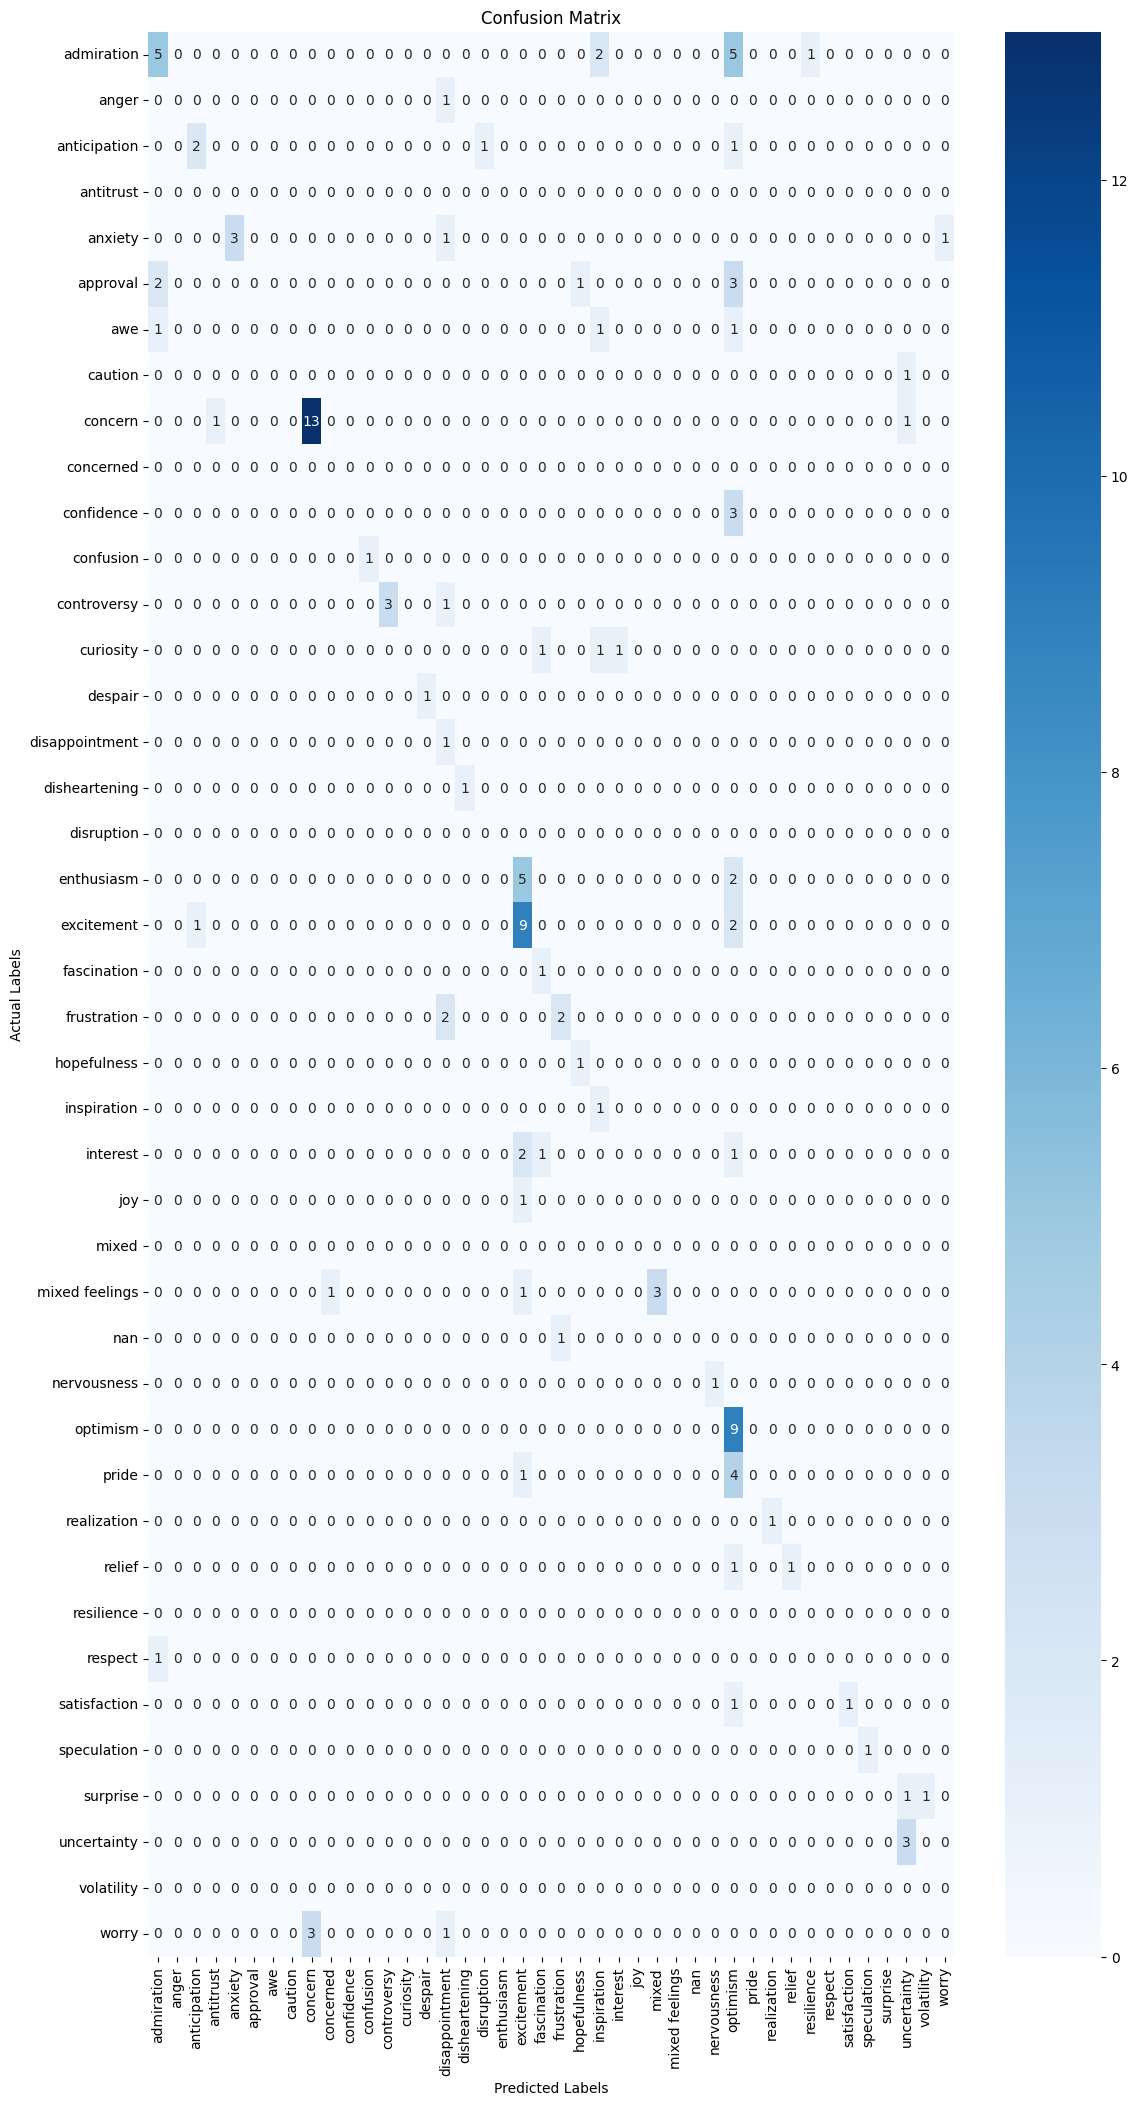

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(fm['Emotion'],fm['new'])

# Define labels for the matrix
labels = rt.index[:-3]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(13, 25))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()